Victor CHAU & Tahar AMAIRI
# IFT 870 - Forage de données
## TP1 : Exploration de données

### Sommaire

* [1. Représentation des données](#question1)
    * [a) Corrélation](#correlation)
    * [b) ACP](#acp)
* [2. Mesure de distance](#question2)
    * [a) Choix de la mesure](#choix)
    * [b) Distance de Mahalanobis](#maha)
* [3. Choix du modèle de classification](#question3)
    * [a) KMeans vs KNN](#K)
    * [b) Gaussian Mixture Model](#GMM)
* [4. Application](#question4)

## Importation des données

In [106]:
# import libs
from matplotlib import pyplot as plt
from IPython.display import display
import seaborn as sns
import pandas as pd
import numpy as np

# read CSV
data = pd.read_csv('TP1_data.csv', index_col=0)

# print the df
data.head()

,attribut1,attribut2,attribut3,attribut4,classe
id1,38.0,33.0,10.0,19.0,0
id2,38.2,23.4,17.0,16.6,0
id3,33.0,24.0,19.0,23.0,0
id4,31.0,21.0,29.0,16.0,0
id5,37.0,27.0,24.0,12.0,0


## 1. Représentation des données <a class="anchor" id="question1"></a>
### a) Corrélation <a class="anchor" id="correlation"></a>

In [42]:
# compute correlation matrix
corr = data.iloc[:,0:4].corr()
# print
corr

,attribut1,attribut2,attribut3,attribut4
attribut1,1.000000,0.017056,-0.890974,-0.622651
attribut2,0.017056,1.000000,-0.258163,-0.242347
attribut3,-0.890974,-0.258163,1.000000,0.372298
attribut4,-0.622651,-0.242347,0.372298,1.000000


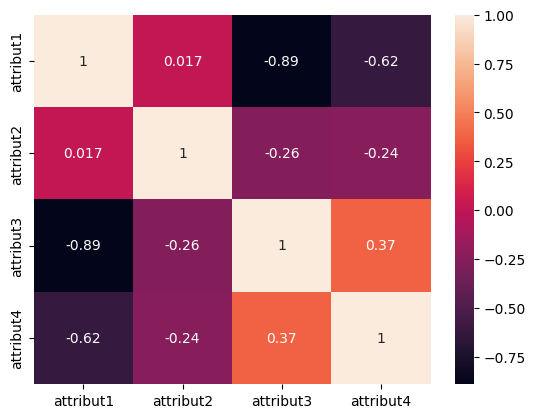

In [43]:
# heatmap
sns.heatmap(corr, annot=True);

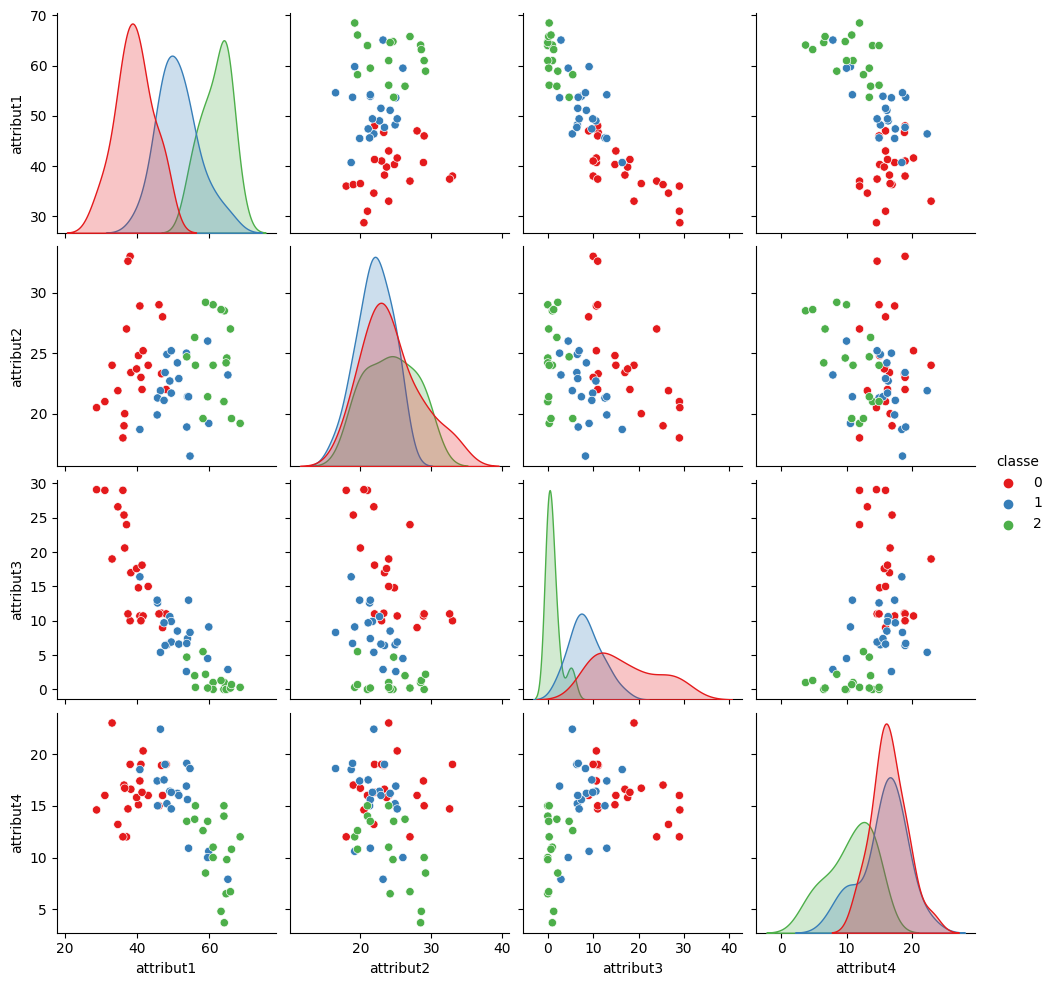

In [45]:
# pair plot
sns.pairplot(data, hue='classe', palette='Set1');

In [107]:
# group by classes
grouped = data.groupby('classe')

# compute the correlation matrix for each class
for name, group in grouped:
    corrClass = group.drop('classe', axis=1).corr()
    print("Matrix correlation for class {}:".format(name))
    display(corrClass)

Matrix correlation for class 0:


,attribut1,attribut2,attribut3,attribut4
attribut1,1.000000,0.302290,-0.784024,0.205335
attribut2,0.302290,1.000000,-0.671647,0.097789
attribut3,-0.784024,-0.671647,1.000000,-0.496368
attribut4,0.205335,0.097789,-0.496368,1.000000


Matrix correlation for class 1:


,attribut1,attribut2,attribut3,attribut4
attribut1,1.000000,0.137804,-0.590792,-0.726196
attribut2,0.137804,1.000000,-0.543282,-0.303635
attribut3,-0.590792,-0.543282,1.000000,0.142723
attribut4,-0.726196,-0.303635,0.142723,1.000000


Matrix correlation for class 2:


,attribut1,attribut2,attribut3,attribut4
attribut1,1.000000,-0.213961,-0.620437,-0.427720
attribut2,-0.213961,1.000000,-0.035696,-0.621881
attribut3,-0.620437,-0.035696,1.000000,0.136993
attribut4,-0.427720,-0.621881,0.136993,1.000000


On remarque que l'attribut 1 est fortement corrélé négativement avec les attributs 3 et 4 (-0.89 et -0.62 respectivement). Les attributs 3 et 4 sont légérement corrélés positivement (0.37). Les attributs 1 et 2 sont très peu corrélés (0.017), ainsi que les attributs 2 et 4 (-0.24). De plus, cela se remarque aussi sur le pairplot, où les attributs corrélés ont un nuage de points formant une droite linéaire. Par ailleurs, les relations entre chaque attribut sont différentes comme nous l'avons vu (corrélation négative entre 1 et 3 & 4, corrélation positive entre 3 et 4). 

Il semble que les relations de corrélation ne soient pas identiques pour toutes les classes.  On remarque notamment par exemple, dans la classe 0 que l'attribut a une plus forte corrélation avec les attributs 1 et 3 que les autres classes. On remarque dans la classe 2, que l'attribut 2 a une corrélation avec la 4, tandis que dans les autres classes, la corrélation est plûtot faible. La relation entre les attributs peut donc être différente pour chaque classe.

Par conséquent, il est intéressant d'effectuer une ACP car on a de l'information redondante entre les attributs, permettant ainsi de réduire la dimensionnalité des données.


### b) ACP <a class="anchor" id="acp"></a>

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# separate labels from data
X = data.iloc[:,0:4].to_numpy()
Y = data['classe'].to_numpy()

# normalize the data
scaler = StandardScaler()
XNorm = scaler.fit_transform(X)

# PCA
pca = PCA()
pca.fit(XNorm);

# printing the variance explained by each dimension
for i, var in enumerate(pca.explained_variance_ratio_): 
    print('Dimension {} variance: {}'.format(i,var))

Dimension 0 variance: 0.5853292650540708
Dimension 1 variance: 0.2490915231049647
Dimension 2 variance: 0.16140425776825837
Dimension 3 variance: 0.004174954072706067


On remarque qu'avec 2 composantes, on arrive à expliquer plus de 80 % de la variance des données. Par conséquent, on pourra normalement s'en tirer avec une ACP à 2 dimensions. Vérifions si c'est le cas :

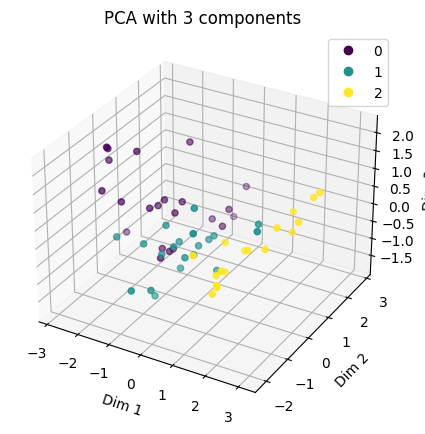

In [109]:
# compute PCA with 3 dim
pca3 = PCA(n_components=3)
XProj3 = pca3.fit_transform(XNorm)

# plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
sc3D = ax.scatter3D(XProj3[:,0], XProj3[:,1],XProj3[:,2], c=Y);
ax.set_xlabel('Dim 1')
ax.set_ylabel('Dim 2')
ax.set_zlabel('Dim 3')
ax.legend(*sc3D.legend_elements())
plt.title("PCA with 3 components")
plt.show()

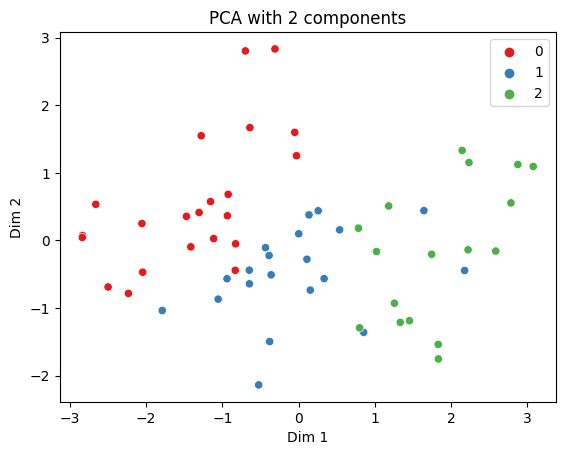

In [110]:
# compute PCA with 2 dim
pca2 = PCA(n_components=2)
XProj2 = pca2.fit_transform(XNorm)

# plot
sns.scatterplot(x=XProj2[:,0], y=XProj2[:,1], hue=Y, palette="Set1");
plt.xlabel("Dim 1");
plt.ylabel("Dim 2");
plt.title("PCA with 2 components")
plt.show()

On remarque que la séparation n'est pas plus distincte lorsqu'on utilise une ACP à 3 dimensions, par conséquent, une ACP à 2 dimensions semble suffire. Vérifions cela maintenant numériquement en calculant le centroide projeté de chaque classe : 

In [155]:
from scipy.spatial import distance

# compute the PCA accuracy based on the distance between each point and each class centroid 
def getProjectionAcc(X, Y, distance, **kwargs):
    labels = set(Y)
    coord = list()
    pred = list()
    mahaByClass = 'InvCorrClass' in kwargs
    
    # compute centroid coord
    for l in labels:
        idx = np.where(Y == l)[0]
        coord.append(np.mean(X[idx,:], axis=0))

    # for each point, get its closest centroid
    for i, x in enumerate(X):
        d = list()
        for centroid in coord:
            if mahaByClass:
                VI = kwargs['InvCorrClass'][Y[i]]
                d.append(distance(x,centroid,VI))
            else:
                d.append(distance(x,centroid,**kwargs))
        pred.append(np.argmin(d))
    
    # return the accuracy based on the truth labels
    return np.mean(pred == Y)

accPCA3 = getProjectionAcc(XProj3, Y, distance.euclidean)  
accPCA2 = getProjectionAcc(XProj2, Y, distance.euclidean)

print("3 dim PCA accuracy :", accPCA3)
print("2 dim PCA accuracy :", accPCA2)

3 dim PCA accuracy : 0.8813559322033898
2 dim PCA accuracy : 0.8983050847457628


On remarque qu'on obtient une meilleure projection en utilisant deux dimensions (90 % de précision contre 88 % pour une projection à 3 dimensions) et que la différence est minime comme noté précédemment visuellement. On peut donc partir sur une ACP à 2 dimensions.

## 2. Mesure de distance <a class="anchor" id="question2"></a>
### a) Choix de la distance <a class="anchor" id="choix"></a>

Etant donné que nous avons aucune idée sur la nature des attributs (i.e s'ils sont de différentes unités par exemple) et que nous avons une corrélation entre les attributs et les classes, il est plus approprié d'utiliser ici la distance de Mahalanobis. Vérifions cela numériquement :

In [158]:
# compute the accuracy of the Manhattan distance
accManhattan = getProjectionAcc(XProj2, Y, distance.cityblock)

# compute the inverse of the correlation matrix
dfProj2 = pd.DataFrame({'Dim 1' : XProj2[:,0], 'Dim 2' : XProj2[:,1], 'classe' : Y})
VI = np.linalg.inv(dfProj2.iloc[:,0:2].corr())
# compute the accuracy of the Mahalanobis distance
accMahalanobis = getProjectionAcc(XProj2, Y, distance.mahalanobis, VI = VI)

# print results
print("Manhattan distance accuracy :", accManhattan)
print("Euclidean distance accuracy :", accPCA2)
print("Mahalanobis distance accuracy :", accMahalanobis)

Manhattan distance accuracy : 0.8813559322033898
Euclidean distance accuracy : 0.8983050847457628
Mahalanobis distance accuracy : 0.8983050847457628


On remarque que la distance euclidienne et celle de Mahalanobis donnent exactement les mêmes précisions puis en second arrive la distance de Manhattan.

### b) Distance de Mahalanobis <a class="anchor" id="maha"></a>

In [159]:
# group by classes
grouped = dfProj2.groupby('classe')

# compute the inverse of the correlation matrix for each class
InvCorrClass = dict()
for name, group in grouped:
    InvCorrClass[name] =  np.linalg.inv(group.drop('classe', axis=1).corr())

# compute the accuracy of the Mahalanobis distance
accMahalanobisClass = getProjectionAcc(XProj2, Y, distance.mahalanobis, InvCorrClass = InvCorrClass)

# print
print("Mahalanobis distance accuracy using each class:", accMahalanobisClass)

Mahalanobis distance accuracy using each class: 0.8813559322033898


Il vaut mieux donc utiliser une matrice de covariance pour toutes les données concernant le calcul de la distance de Mahalanobis car on obtient une plus faible précision en utilisant une matrice de covariance pour chaque classe. Finalement, on peut choisir soit la distance de Mahalanobis ou la distance euclidienne, nous prendrons le second choix car nous utiliserons dans la prochaine partie l'algorithme de Kmeans via le module sklearn. En effet, cette implémentation utilise en interne la distance euclidienne.

## 3. Choix du modèle de classification <a class="anchor" id="question3"></a>
### a) KMeans vs KNN <a class="anchor" id="K"></a>

In [176]:
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# KMEANS
kmeans = KMeans(n_clusters=len(set(Y)), n_init='auto', max_iter=1000, random_state=0)
kmeans.fit(XProj2);

# KNN (Split the data then train)
XTrain, XTest, YTrain, YTest = train_test_split(XProj2, Y, test_size=0.3, random_state=0)
knn = KNN(n_neighbors=5, n_jobs=-1)
knn.fit(XTrain, YTrain);

# print results
print("KMeans NMI :", normalized_mutual_info_score(kmeans.labels_, Y))
print("KNN test accuracy :",  knn.score(XTest, YTest))

KMeans NMI : 0.46029546156211804
KNN test accuracy : 0.9444444444444444


Pour évaluer la performance d'un algorithme non-supervisé tel que KMeans, on peut utiliser l'information mutuelle normalisée entre les vrais classes $Y$ et les clusters obtenus grâce à KMeans. Entre autre, cette mesure permet de savoir comment deux ensembles s'accordent (combien d'informations ils partagent l'un sur l'autre). Plus la valeur est proche de 1, plus les clusters obtenus respectent la partition des vrais classes. Concernant KNN, on utilise tout simplement un data set de test pour obtenir la précision de prédiction.

Finalement, KNN semble avoir une meilleure performance et est donc le plus adéquat.

### b) Gaussian Mixture Model <a class="anchor" id="GMM"></a>

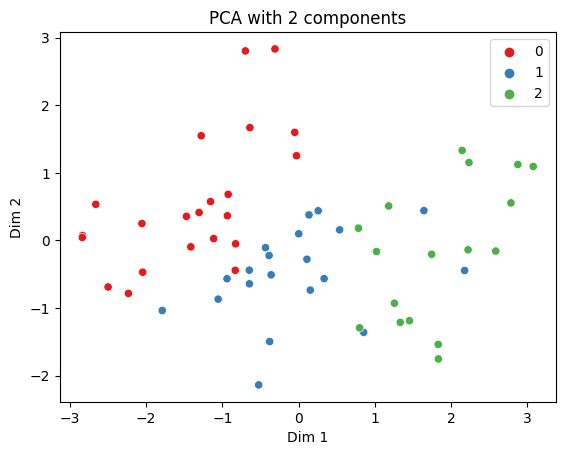

In [177]:
# plot
sns.scatterplot(x=XProj2[:,0], y=XProj2[:,1], hue=Y, palette="Set1");
plt.xlabel("Dim 1");
plt.ylabel("Dim 2");
plt.title("PCA with 2 components")
plt.show()

On remarque que les différents clusters ont une même forme légérement oblique. De plus, comme nous l'avons vu avec la distance de Mahalanobis, l'utilisation d'une matrice de covariance de classe, n'apporte aucune amélioration. Par conséquent, on peut estimer que tous les clusters partagent la même matrice de covariance, ce qui signifie utiliser "tied". 

In [188]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture
gm = GaussianMixture(n_components=3, covariance_type="tied", max_iter=1000, random_state=0)

# print 
print("GMM NMI :",  normalized_mutual_info_score(gm.fit_predict(X),Y))

GMM NMI : 0.47357432386324005


Nous obtenons approximativement la même NMI que KMeans. Le résultat n'est pas mauvais ($\approx 0.5$), mais ce n'est pas assez pour nous permettre d'affirmer que les données proviennent d'une distribution normale.

On retiendra donc KNN comme modèle.

## 4. Application <a class="anchor" id="question4"></a>

En résumé :
 
- ACP : 2 dimensions
- Distance : Euclidienne
- Modèle : KNN

Avant de prédire, entrainons le modèle sur tout le jeu de données :

In [191]:
# train with all the data
knn.fit(XProj2, Y);

On peut donc maintenant prédire (il faut tout d'abord projeter l'entrée vers l'ACP à 2 dimensions) : 

In [196]:
# normalize prior to data
obsNorm = scaler.transform([[52.1, 23.0, 6.1, 16.5]])

# project into the 2 dim PCA
obsProj2 = pca2.transform(obsNorm)

# make the prediction
pred = knn.predict(obsProj2)

# print
print("The predicted class is :", pred)

The predicted class is : [1]


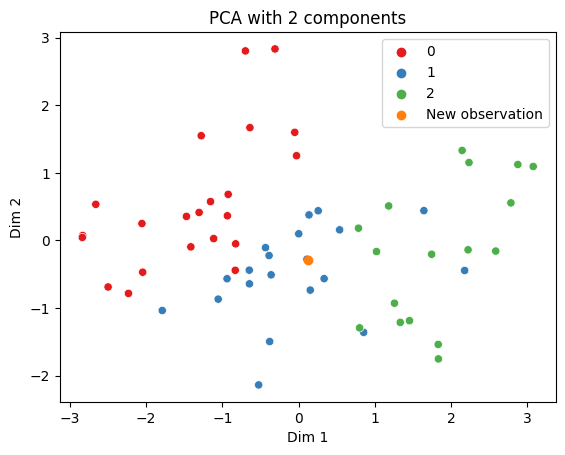

In [201]:
# plot the new observation
sns.scatterplot(x=XProj2[:,0], y=XProj2[:,1], hue=Y, palette="Set1");
plt.scatter(obsProj2[0][0], obsProj2[0][1], label="New observation")
plt.xlabel("Dim 1");
plt.ylabel("Dim 2");
plt.title("PCA with 2 components")
plt.legend()
plt.show()

La prédiction est totalement cohérente avec la représentation visuelle : en effet, celle-ci tombe en plein milieu de la classe 1 !